# Chapter 4: Roots of (non-linear) Equations

## Introduction

Goal of this chapter:

**Find the solutions of f(x)=0, where the function f is given.**

The solutions of this equation are called the *roots* of the equation or the *zeroes* of the function f.

The function $f$ might be defined as:
1. A mathematical statement, for instance: f(x) = log(x)
2. A computer algorithm.

$f$ might have:
1. A single root, for instance: f(x) = log(x)
2. Multiple roots: f(x) = $x^2$
3. An infinite number of roots: f(x) = cos(x)
4. No root: f(x) = 

The methods presented in this chapter:
* Are meant to find *a single* root.
* Are iterative: they start from an estimate of the root and refine it.
* Require prior *bracketing* of the root: determine its lower and upper bounds.
* Assume that $f$ is *continuous* in the bracketed interval.

### Illustration

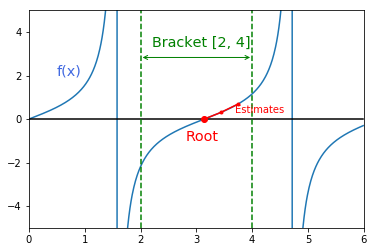

In [131]:
from matplotlib import pyplot as plt
from numpy import arange, tan, zeros

def intro_plot():
    xmin = 0
    xmax = 6
    x = arange(xmin, xmax, 0.01)
    plt.plot(x, tan(x), '-')
    plt.plot(x, zeros(x.size), '-', color='black')
    miny = -5
    maxy = 5
    plt.ylim(miny, maxy)
    plt.xlim(xmin, xmax)

    # Annotation
    label_size = 'x-large'
    plt.annotate("f(x)", xy=(0.5, 2), fontsize=label_size, color='royalblue')

    # Bracket
    minx = 2
    maxx = 4
    bracket_color = 'green'
    plt.plot([minx, minx], [miny, maxy], '--', color=bracket_color)
    plt.plot([maxx, maxx], [miny, maxy], '--', color=bracket_color)
    ybracket = 2/3*(maxy)
    plt.annotate("Bracket [{}, {}]".format(minx, maxx), xy=((minx+maxx)/2-0.8, ybracket), color=bracket_color, fontsize=label_size)
    plt.annotate(s='', xy=(minx, ybracket-0.5), xytext=(maxx,ybracket-0.5), arrowprops=dict(arrowstyle='<->', color=bracket_color))
    
    # Root
    from math import pi
    #plt.plot([0, 6], [0, 0], '--', color='black')
    plt.plot([pi], [0], 'o', color='red')
    plt.annotate("Root", xy=(2.8, -1), color='red', fontsize=label_size)
    return plt

plt = intro_plot()
# Estimates
step = 0.3
x = arange(pi, maxx, step)
plt.plot(x, tan(x), '.-', color='red')
plt.annotate('Estimates', xy=(maxx-step, tan(pi+step)), color='red')
plt.show()


## Incremental Search

Basic idea: if $f(x_1)$ and $f(x_2)$ have opposite signs, then the root is in [$x_1$, $x_2$]:

Illustration:

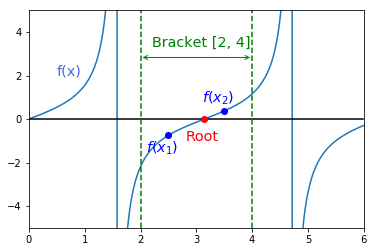

In [132]:
plt = intro_plot()
plt.plot([])
x1 = 2.5
x2 = 3.5
label_color = 'blue'
plt.plot([x1, x2], [tan(x1), tan(x2)], 'o', color=label_color)
shift = 0.8
plt.annotate(s="$f(x_1)$", xy=(x1-shift/2, tan(x1)-shift), fontsize=label_size, color=label_color)
plt.annotate(s="$f(x_2)$", xy=(x2-shift/2, tan(x2)+shift/2), fontsize=label_size, color=label_color)
plt.show()

Incremental search evaluates $f$ at interval $\Delta x$ and looks for a change of sign:

In [133]:
from numpy import sign
def root_find_incremental(f, xmin, xmax, delta_x):
    '''
    f is the function for which we will find a zero
    xmin and xmax define the bracket
    delta_x is the step used in incremental search
    Returns (a, b), the bounds between which the root is located
    a = b = None if no root could be found
    '''
    a = xmin
    b = a + delta_x
    fa = f(a)
    fb = f(b)
    while(b <= xmax):
        if sign(fa) != sign(fb):
            return a, b
        a = b
        b += delta_x
        fa = fb
        fb = f(b)
    return None, None

In [ ]:
f = tan
(a, b) = root_find_incremental(f, 2, 4, 0.1)
print(a, b)

In [ ]:
# Plot
plt = intro_plot()
plt.xlim(2, 4)
plt.plot([a, b], [f(a), f(b)], 'X')
plt.annotate("Result", xy=(pi, 1), color='darkorange', fontsize=label_size)
plt.show()

Issue with incremental search:
* Accurate estimation of the root requires a small $\Delta x$ value
* Number of evaluations of $f$ is $\frac{x_{\mathrm{max}}-x_{\mathrm{min}}}{\Delta x}$

## Method of Bisection

The bisection method *halves* the interval until it becomes smaller than $\Delta x$.

It is based on the following principles:
* If there is a root in [$x_1$, $x_2$], then f($x_1$) and f($x_2$) have opposite signs (as in incremental search).
* Define $x_3=\frac{x_1+x_2}{2}$. If f($x_1$) and f($x_3$) have opposite signs, then the root is in [$x_1$, $x_3$]; otherwise, it's in [$x_2$, $x_3$]. 

In [143]:
def root_find_bisection(f, xmin, xmax, delta_x):
    '''
    f is the function for which we will find a zero
    xmin and xmax define the bracket
    delta_x is the desired accuracy
    Returns (a+b)/2, where the root is in [a, b] and |b-a| <= delta_x
    Returns None if no root could be found
    '''
    
    a = xmin
    b = xmax
    fa = f(a)
    fb = f(b)
    if sign(fa) == sign(fb):
        return None # Root is not bracketed
    while(b-a > delta_x):
        # At this point, fa and fb always have different signs
        c = (a+b)/2
        fc = f(c)
        if sign(fc) == sign(fa):
            # The root must be in [c, b]
            a = c
            fa = fc
        else:
            b = c
            fb = fc
    return (a+b)/2

In [ ]:
f = tan
x = root_find_bisection(f, 2, 4, 0.1)
print(x)

In [ ]:
# Plot
plt = intro_plot()
plt.xlim(2, 4)
plt.plot([x], [f(x)], 'X')
plt.annotate("Result", xy=(pi, 1), color='darkorange', fontsize=label_size)
plt.show()